# Primal-Dual Algorithm for Constrained Stochastic Optimization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### initialize start by random and calculate primal

In [5]:
class primalDualModel:
    def __init__(self,sysDimension):
        self.sysDimension = sysDimension
        self.weights = np.ones(sysDimension)/sysDimension
        self.lambda1 = np.random.rand(1)+0.5
        self.lambda2 = np.random.rand(1)+0.5
        self.muList = np.random.uniform(0.5,0.9,sysDimension)
        self.compensation = np.random.rand(sysDimension)
        assetsRewards = np.random.rand(sysDimension,sysDimension)
        self.assetsMean = np.mean(assetsRewards,1)
        self.assetsCov = np.cov(assetsRewards)
        self.c = self.weights.transpose().dot(self.assetsMean)

In [6]:
def primalDualUpdate(PDModel,stepSize):
    PDModel.weights = PDModel.weights - stepSize*((PDModel.assetsCov+PDModel.assetsCov.T).dot(PDModel.weights)+PDModel.lambda1*PDModel.assetsMean+PDModel.lambda2*np.ones(PDModel.sysDimension)+PDModel.muList)
    PDModel.compensation = PDModel.compensation + stepSize*(2*PDModel.muList*PDModel.compensation)
    PDModel.lambda1 = PDModel.lambda1 + stepSize*(PDModel.weights.transpose().dot(PDModel.assetsMean)-PDModel.c)
    PDModel.lambda2 = PDModel.lambda2 + stepSize*(sum(PDModel.weights)-1)
    PDModel.muList = PDModel.muList + stepSize*(PDModel.weights-PDModel.compensation**2)

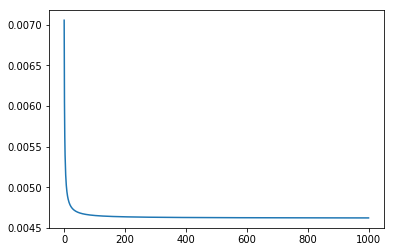

In [7]:
pdModel = primalDualModel(10)
result = []
for i in range(1000):
    primalDualUpdate(pdModel,np.exp(-i-1))
    result.append(pdModel.weights.T.dot(pdModel.assetsCov).dot(pdModel.weights))
plt.plot(result)    

In [8]:
sum(pdModel.weights)

0.62967591854874594